In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pip install ultralytics


In [ ]:
%cd /content/gdrive/MyDrive/reslt

/content/gdrive/MyDrive/reslt


In [ ]:
!python train.py --data-dir /content/gdrive/MyDrive/reslt --output-dir /content/gdrive/MyDrive/reslt

Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=coco8.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_wid

In [ ]:
!python trainseg.py --data-dir /content/gdrive/MyDrive/reslt --output-dir /content/gdrive/MyDrive/reslt/seg

100% 5.90M/5.90M [00:00<00:00, 99.5MB/s]
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolo11n-seg.pt, data=coco8-seg.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labe


image 1/1 /content/StudentPhotosss.jpeg: 640x512 1 person, 14.2ms
Speed: 2.2ms preprocess, 14.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


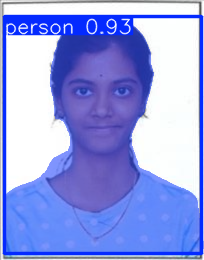

'/content/gdrive/MyDrive/results//result_image.jpg'

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the trained YOLO model
model = YOLO('/content/gdrive/MyDrive/reslt/runs/segment/train/weights/best.pt')

# Path to your custom image
image_path = '/content/StudentPhotosss.jpeg'

# Perform inference on the custom image
results = model(image_path)

# Display the results by accessing the first result in the list
results[0].show()  # Show the image with bounding boxes, labels, and confidences

# Optionally save the output to a specific directory
output_dir = '/content/gdrive/MyDrive/results/'
results[0].save(filename=f"{output_dir}/result_image.jpg")  # Save the image to the specified directory


In [ ]:
from ultralytics import YOLO

# Load the trained YOLO model
model = YOLO('/content/gdrive/MyDrive/reslt/runs/detect/train/weights/best.pt')

# Path to your custom image
image_path = '/content/StudentPhotosss.jpeg'

# Perform inference on the custom image with a lower confidence threshold (e.g., 0.4)
results = model(image_path, conf=0.4)

# Check if any detections are made
if results[0].boxes:  # If there are detections
    results[0].plot()  # Plot the image with detections
    output_dir = '/content/gdrive/MyDrive/results/'
    results[0].save(filename=f"{output_dir}/result_image.jpg")  # Save the image to the specified directory
else:
    print("No detections found.")



image 1/1 /content/StudentPhotosss.jpeg: 640x512 1 person, 22.1ms
Speed: 5.4ms preprocess, 22.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 512)


In [ ]:
if results[0].boxes:  # Check if there are detections
    results[0].plot()
    results[0].save(filename=f"{output_dir}/result_image.jpg")
else:
    print("No detections found.")


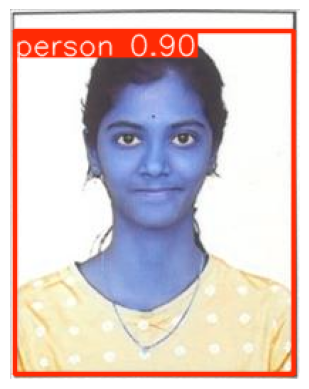

In [ ]:
# To display the image inline
plt.imshow(results[0].plot())  # Display the image inline in Jupyter/Colab
plt.axis('off')  # Optionally remove axes
plt.show()
